In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()
_, metadata = tfds.load('fashion_mnist', with_info=True)
CLASSES = metadata.features['label'].names

print(f"X train: {X_train.shape}")
print(f"Y train: {Y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"Y test: {Y_test.shape}")
print(f"Classes: {CLASSES}")

X train: (60000, 28, 28)
Y train: (60000,)
X test: (10000, 28, 28)
Y test: (10000,)
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
# plt.figure(figsize=(30, 20))
# for i in range(20):
#   image = X_train[i]
#   label = CLASSES[Y_train[i]]
  
#   plt.subplot(4, 10, i + 1)
#   plt.imshow(image, cmap='binary')
#   plt.xlabel(label)

In [5]:
X_train, X_test = X_train/255., X_test/255.
X_train, Y_train = X_train[:20000], Y_train[:20000]

In [6]:
gru_model = tf.keras.Sequential([
  tf.keras.layers.GRU(256, return_sequences=True, input_shape=X_train[0].shape),
  tf.keras.layers.GRU(50),
  tf.keras.layers.Dense(10, activation='softmax')
])

gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = gru_model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

Epoch 1/20
500/500 [==============================] - 7s 7ms/step - loss: 1.7934 - accuracy: 0.2559 - val_loss: 1.3031 - val_accuracy: 0.4645
Epoch 2/20
500/500 [==============================] - 3s 6ms/step - loss: 1.1209 - accuracy: 0.5462 - val_loss: 1.1706 - val_accuracy: 0.5670
Epoch 3/20
500/500 [==============================] - 3s 6ms/step - loss: 0.9340 - accuracy: 0.6336 - val_loss: 0.8497 - val_accuracy: 0.6660
Epoch 4/20
500/500 [==============================] - 3s 6ms/step - loss: 0.8273 - accuracy: 0.6831 - val_loss: 0.7927 - val_accuracy: 0.6967
Epoch 5/20
500/500 [==============================] - 3s 6ms/step - loss: 0.7773 - accuracy: 0.7018 - val_loss: 0.7827 - val_accuracy: 0.7088
Epoch 6/20
500/500 [==============================] - 3s 6ms/step - loss: 0.7427 - accuracy: 0.7208 - val_loss: 0.7624 - val_accuracy: 0.7130
Epoch 7/20
500/500 [==============================] - 3s 6ms/step - loss: 0.7053 - accuracy: 0.7318 - val_loss: 0.7709 - val_accuracy: 0.7147
Epoch 

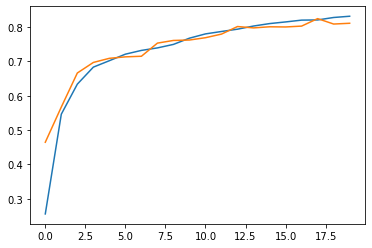

In [7]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

plot_accuracy(history)

Accuracy: 0.8051


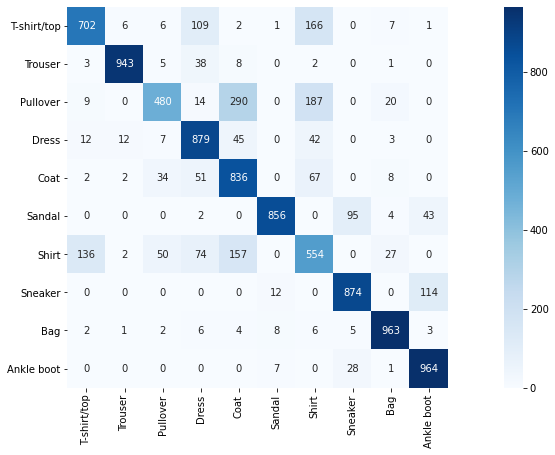

In [8]:
def evaluate_model(model):
  predictions = model.predict(X_test)
  predictions = np.argmax(predictions, axis=1)

  accuracy = accuracy_score(Y_test, predictions)
  print(f"Accuracy: {accuracy}")

  cfm = confusion_matrix(Y_test, predictions)

  plt.figure(figsize=(20, 7))
  sns.heatmap(cfm, square=True, annot=True, xticklabels=CLASSES, yticklabels=CLASSES, fmt='d', cmap='Blues')

evaluate_model(gru_model)

#LSTM

In [13]:
lstm_model = tf.keras.Sequential([
  tf.keras.layers.LSTM(256, return_sequences=True, input_shape=X_train[0].shape),
  tf.keras.layers.LSTM(50),
  tf.keras.layers.Dense(10, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = lstm_model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

Epoch 1/20
500/500 [==============================] - 6s 8ms/step - loss: 1.5459 - accuracy: 0.3629 - val_loss: 1.1586 - val_accuracy: 0.5077
Epoch 2/20
500/500 [==============================] - 3s 7ms/step - loss: 1.0904 - accuracy: 0.5512 - val_loss: 0.9358 - val_accuracy: 0.6200
Epoch 3/20
500/500 [==============================] - 3s 7ms/step - loss: 0.9406 - accuracy: 0.6251 - val_loss: 0.8745 - val_accuracy: 0.6555
Epoch 4/20
500/500 [==============================] - 3s 7ms/step - loss: 0.8678 - accuracy: 0.6555 - val_loss: 0.8244 - val_accuracy: 0.6712
Epoch 5/20
500/500 [==============================] - 3s 6ms/step - loss: 0.8142 - accuracy: 0.6781 - val_loss: 0.8311 - val_accuracy: 0.6708
Epoch 6/20
500/500 [==============================] - 3s 6ms/step - loss: 0.7575 - accuracy: 0.7060 - val_loss: 0.7904 - val_accuracy: 0.6900
Epoch 7/20
500/500 [==============================] - 3s 6ms/step - loss: 0.7089 - accuracy: 0.7268 - val_loss: 0.7180 - val_accuracy: 0.7278
Epoch 

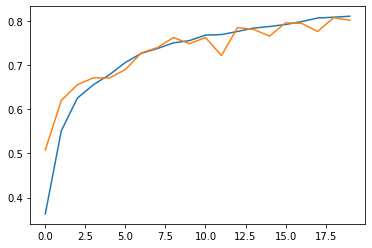

In [14]:
plot_accuracy(history)

Accuracy: 0.7996


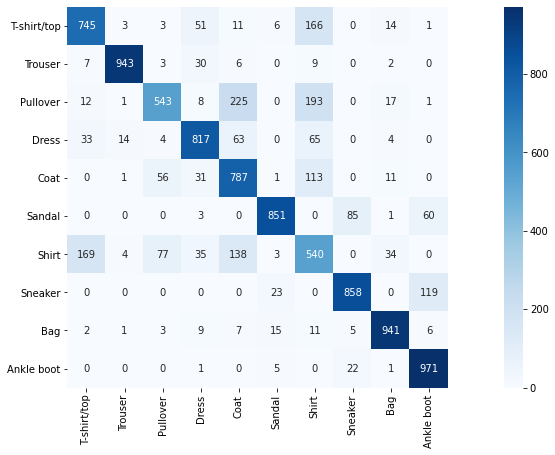

In [15]:
evaluate_model(lstm_model)